In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.spatial.transform import Rotation as R

In [3]:
def generate_A_points(density=10):
    edge1 = np.linspace([0, 0, 0], [1, 2, 0], density)
    edge2 = np.linspace([2, 0, 0], [1, 2, 0], density)
    crossbar = np.linspace([0.5, 1, 0], [1.5, 1, 0], density)
    return np.vstack([edge1, edge2, crossbar])

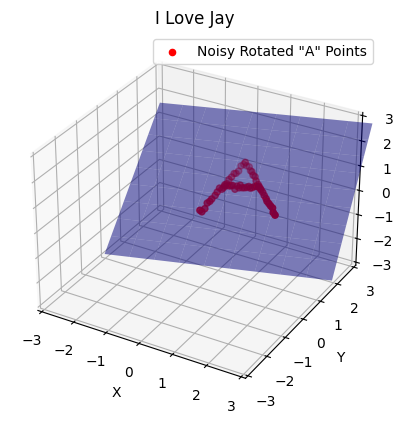

In [24]:
# Rotate the points
theta = np.pi / 6
rotation_axis = [1, 0, 1] # Axis of rotation (around X and Z)
rotation = R.from_rotvec(theta * np.array(rotation_axis) / np.linalg.norm(rotation_axis))
A_points = generate_A_points(density=20)
A_points_rotated = rotation.apply(A_points)

# Normal vector of the initial plane (z=0) and rotate it
normal_vector = np.array([0, 0, 1])
normal_rotated = rotation.apply(normal_vector)

# Add noise perpendicular 
noise_scale = 0.05  
A_points_noisy = A_points_rotated + np.random.normal(scale=noise_scale, size=A_points_rotated.shape) * normal_rotated

pca = PCA(n_components=2)
pca.fit(A_points_noisy)
mean_point = pca.mean_
principal_components = pca.components_
x_grid, y_grid = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10)) 
plane_points = mean_point + x_grid[:, :, np.newaxis] * principal_components[0] + y_grid[:, :, np.newaxis] * principal_components[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(A_points_noisy[:, 0], A_points_noisy[:, 1], A_points_noisy[:, 2], color='r', label='Noisy Rotated "A" Points')

# Plane
ax.plot_surface(plane_points[:, :, 0], plane_points[:, :, 1], plane_points[:, :, 2], alpha=0.5, rstride=1, cstride=1, color='b', edgecolor='none')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('I Love Jay')

ax.legend()
plt.show()

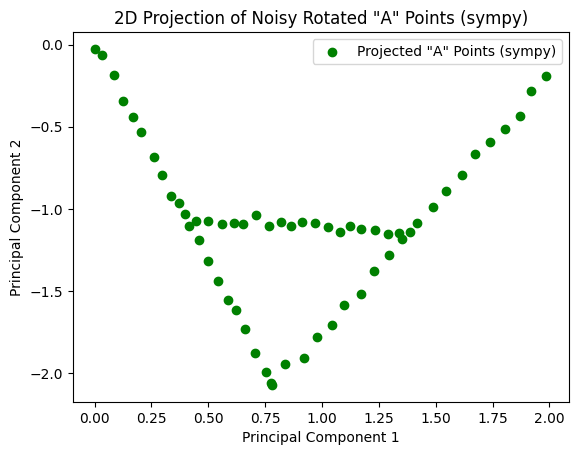

In [25]:
from sympy import Plane, Point3D

sympy_plane = Plane(Point3D(mean_point), normal_vector=Point3D(normal_rotated))
projected_points_sympy = np.array([sympy_plane.projection(Point3D(point)).coordinates for point in A_points_noisy])

# Transform the projected 3D coordinates into the 2D coordinate system using PCA components
transformed_points_2d_sympy = projected_points_sympy.dot(principal_components.T)

fig_2d_sympy, ax_2d_sympy = plt.subplots()
ax_2d_sympy.scatter(transformed_points_2d_sympy[:, 0], transformed_points_2d_sympy[:, 1], color='green', label='Projected "A" Points (sympy)')
ax_2d_sympy.set_xlabel('Principal Component 1')
ax_2d_sympy.set_ylabel('Principal Component 2')
ax_2d_sympy.set_title('2D Projection of Noisy Rotated "A" Points (sympy)')
ax_2d_sympy.legend()
plt.show()